<a href="https://colab.research.google.com/github/ryanpereirax/Intrusion-detector-with-supervised-models/blob/main/Surpevised_Models_Attack_Gear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1 align='center'><font color='red'> Classificação Ataque "Gear" <font></h1>


Este código implementa um pipeline para carregar, pré-processar, treinar e avaliar modelos de aprendizado de máquina com o objetivo de classificar dados de detecção de intrusão em uma rede automotiva (como mensagens CAN). O fluxo principal é dividido em etapas, que incluem:

    Carregamento e pré-processamento dos dados.
    Separação dos dados em conjuntos de treino e teste.
    Criação de um pipeline de processamento para escalonamento, redução de dimensionalidade e classificação.
    Treinamento e avaliação de diversos modelos de aprendizado de máquina.
    Balanceamento dos dados usando a técnica SMOTE para lidar com desbalanceamento nas classes.

Importação da biblioteca CatBoost

In [23]:
pip install catboost

## Importação das Bibliotecas

### Manipulação de Dados
**import pandas as pd**
**import numpy as np**

*pandas e numpy* são bibliotecas fundamentais para manipulação e análise de dados.
pandas é usado para trabalhar com dados em formato tabular (DataFrames), o que facilita a manipulação de colunas e linhas, operações de filtragem e agregação.
numpy oferece suporte a operações numéricas eficientes em arrays e matrizes, além de fornecer funções matemáticas úteis para operações de álgebra linear e estatística.

### Pré-processamento de Dados

**from sklearn.model_selection import train_test_split:**

*train_test_split* é utilizado para dividir os dados em conjuntos de treinamento e teste. Isso é importante para avaliar o desempenho do modelo em dados não vistos, ajudando a evitar overfitting (quando o modelo se ajusta demais aos dados de treinamento).

**from sklearn.preprocessing import StandardScaler, LabelEncoder:**

*StandardScaler* normaliza os dados, ou seja, ajusta os valores para que tenham média zero e desvio padrão um. Isso é essencial para algoritmos que são sensíveis às escalas das features, como SVM e KNN.
LabelEncoder é usado para converter variáveis categóricas em valores numéricos, atribuindo um número inteiro para cada categoria. Isso é útil para transformar rótulos de saída que são categóricos em uma forma numérica que os algoritmos de aprendizado de máquina podem utilizar.

**from sklearn.decomposition import PCA:**

*PCA (Principal Component Analysis)* é uma técnica de redução de dimensionalidade. Ela transforma as features originais em um novo conjunto de variáveis, chamadas componentes principais, que são combinações lineares das originais, mantendo a maior variabilidade possível. Isso ajuda a melhorar a eficiência e reduzir o ruído nos dados.

### Pipeline

**from sklearn.pipeline import Pipeline:**
        
*Pipeline* é usado para encadear várias etapas de processamento e modelagem de forma sequencial. Por exemplo, você pode combinar o pré-processamento (como padronização) e o treinamento do modelo em um único objeto, facilitando a automação do fluxo de trabalho.

### Modelos de Machine Learning

**from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier:**
        
*RandomForestClassifier* é um modelo de ensemble que usa múltiplas árvores de decisão para melhorar a precisão da previsão e reduzir o risco de overfitting.
  
*GradientBoostingClassifier* é outro modelo de ensemble que combina múltiplos modelos fracos (como árvores de decisão), ajustando iterativamente os erros dos modelos anteriores para melhorar a previsão.

**from sklearn.neighbors import KNeighborsClassifier:**
        
*KNeighborsClassifier (KNN)* é um algoritmo de aprendizado baseado em instâncias que classifica os pontos com base na proximidade aos vizinhos mais próximos, de acordo com uma métrica de distância euclidiana.

**from sklearn.linear_model import LogisticRegression:**
        
*LogisticRegression* é um algoritmo de classificação linear que utiliza a função logística para prever a probabilidade de uma amostra pertencer a uma determinada classe.

**from sklearn.tree import DecisionTreeClassifier:**
        
*DecisionTreeClassifier* constrói uma árvore de decisão baseada nas features dos dados, dividindo-as de forma recursiva para maximizar a separação entre as classes.

**from sklearn.svm import SVC:**

*SVC (Support Vector Classifier)* é um algoritmo de classificação que busca encontrar o hiperplano ótimo que separa as classes, maximizando a margem entre os pontos de diferentes categorias.

Métricas de Avaliação

**from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix):**
        
Essas funções fornecem métricas de desempenho para avaliar a qualidade dos modelos.

*accuracy_score:* porcentagem de previsões corretas.

*precision_score:* proporção de previsões positivas corretas em relação ao total de previsões positivas.

*recall_score:* proporção de previsões positivas corretas em relação ao total de positivos reais.

*f1_score:* média harmônica entre precisão e recall, útil para dados desbalanceados.

*roc_auc_score:* mede a área sob a curva ROC, que mostra a capacidade do modelo em distinguir entre classes.

*classification_report:* fornece um resumo das métricas de precisão, recall e F1 para cada classe.

*confusion_matrix:* matriz que mostra o número de previsões corretas e incorretas para cada classe.

**from sklearn.metrics import ConfusionMatrixDisplay:**

*ConfusionMatrixDisplay* é usado para plotar a matriz de confusão de maneira gráfica, facilitando a visualização do desempenho do modelo.

### Tratamento de Desequilíbrio nos Dados

**from imblearn.over_sampling import SMOTE:**
        
*SMOTE* (Synthetic Minority Over-sampling Technique) é uma técnica usada para lidar com datasets desbalanceados, criando exemplos sintéticos para a classe minoritária, de modo a equilibrar a distribuição das classes.

### Modelos Adicionais

**import xgboost as xgb:**

*xgboost* é uma biblioteca de gradiente boosting otimizada, com alto desempenho para grandes datasets e tarefas complexas. xgboost.XGBClassifier é comumente utilizado para tarefas de classificação.

**from catboost import CatBoostClassifier:**
        
*CatBoostClassifier* é um algoritmo de gradient boosting especialmente otimizado para lidar com dados categóricos sem a necessidade de pré-processamento explícito, como One Hot Encoding.

### Visualização de Dados

**import matplotlib.pyplot as plt:**

*matplotlib* é uma biblioteca de visualização de dados. O pyplot é usado para gerar gráficos, como gráficos de linha, dispersão, histogramas, etc., ajudando a explorar os dados e interpretar os resultados dos modelos.

Esse conjunto de importações permite criar um pipeline completo de aprendizado de máquina, começando pela manipulação de dados e pré-processamento, passando pela modelagem com diferentes algoritmos e avaliação dos resultados, até a visualização gráfica das métricas.



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Aqui carregamos o dataset do ataque Gear completo.

O código está usando a função pd.read_csv() da biblioteca pandas para carregar um arquivo CSV chamado gear_dataset.csv.

In [25]:
gear_df = pd.read_csv('/content/gear_dataset.csv') # Substitua pelo caminho correto do arquivo
gear_df.head()

,1478193190.056566,0140,8,00,00.1,00.2,00.3,10,29,2a,24,R
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R


### Aqui, o código seleciona amostras de duas classes diferentes no dataset original, que são identificadas pela coluna 'R'.

    amostras_R: São selecionadas amostras onde o valor da coluna 'R' é igual a 'R'. O código escolhe 38.458 linhas aleatórias dessa classe.
    amostras_T: Da mesma forma, são selecionadas 5.972 amostras onde o valor da coluna 'R' é igual a 'T'.

**O parâmetro random_state=42** é usado para garantir que a amostragem seja reproduzível, ou seja, sempre que o código for executado, as mesmas amostras serão selecionadas.
O número de amostras escolhidas (n=38_458 para 'R' e n=5_972 para 'T') indica que o objetivo é manter a proporção original das classes, mas reduzindo o tamanho total do dataset.

**pd.concat([amostras_R, amostras_T]):** Combina as amostras das duas classes em um único DataFrame.

**.sample(frac=1, random_state=42):** Embaralha as linhas do DataFrame combinado. O parâmetro frac=1 indica que todas as linhas serão incluídas na amostragem, apenas mudando a ordem.

**.reset_index(drop=True):** Reseta o índice do DataFrame, descartando o índice original. Isso é útil para garantir que o novo DataFrame tenha índices sequenciais a partir de zero.

Essa linha salva o DataFrame balanceado em um arquivo CSV chamado **gear_df_proporcional.csv.**

**O argumento index=False** garante que o índice do DataFrame não seja incluído no arquivo CSV, resultando em um arquivo sem coluna de índice adicional.

Essas operações têm como objetivo criar uma versão reduzida e balanceada do dataset original, mantendo uma proporção específica entre as classes 'R' e 'T'. A ideia é trabalhar com uma amostra representativa dos dados, o que pode ser útil para reduzir o tempo de processamento.

In [26]:
# Amostras de 1% do Dataset Original
amostras_R = gear_df[gear_df['R'] == 'R'].sample(n=38_458, random_state=42)
amostras_T = gear_df[gear_df['R'] == 'T'].sample(n=5_972, random_state=42)
gear_df_proporcional = pd.concat([amostras_R, amostras_T]).sample(frac=1, random_state=42).reset_index(drop=True)

gear_df_proporcional.to_csv('gear_df_proporcional.csv', index=False)

## Função de Carregamento e Pré-Processamento de Dados

Definição da Função

**def load_and_preprocess_data(file_path):**

    A função load_and_preprocess_data recebe um argumento file_path, que é o caminho do arquivo CSV contendo o dataset.

Carregamento do Dataset

**gear_df = pd.read_csv(file_path)**

    Usa a função pd.read_csv() para carregar os dados do arquivo CSV fornecido. O resultado é armazenado na variável dos_df como um DataFrame do pandas.

Renomeação das Colunas

**gear_df.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]',
                  'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']**

    Aqui, as colunas do DataFrame são renomeadas para dar nomes mais significativos e facilitar a identificação. Essa renomeação é útil para garantir que os nomes das colunas estejam consistentes e fáceis de entender.

Conversão de Tipos

**gear_df['CAN_ID'] = gear_df['CAN_ID'].apply(lambda x: int(str(x), 16))
for i in range(8): gear_df[f'DATA[{i}]'] = gear_df[f'DATA[{i}]'].apply(lambda x: int(str(x), 16))**

    Essas linhas convertem os valores das colunas 'CAN_ID' e 'DATA[0]' a 'DATA[7]' de hexadecimal para inteiro.
        str(x): Converte o valor para string, caso não seja.
        int(str(x), 16): Converte a string representando um número hexadecimal para um número inteiro.
    Esse processo é necessário porque os dados brutos podem estar no formato hexadecimal e precisam ser convertidos para inteiros para serem usados em algoritmos de aprendizado de máquina.

Separação das Features e do Target


**X = gear_df.drop(columns=['Timestamp', 'Flag', 'CAN_ID', 'DLC', 'DATA[1]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[7]'])
y = gear_df['Flag']**

    X representa as features (variáveis independentes) que serão usadas para treinar o modelo. A função drop() remove as colunas especificadas que não são relevantes para o modelo, como 'Timestamp', 'Flag' (que é a variável alvo), e algumas colunas de 'DATA' e 'CAN_ID' que foram escolhidas para serem descartadas.
    y representa a variável alvo (ou rótulo) que o modelo deve prever. Nesse caso, é a coluna 'Flag', que contém os rótulos de classificação.

Aplicação de Label Encoding na Variável Alvo

**label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)**

    LabelEncoder() é utilizado para converter os valores da coluna 'Flag' em valores numéricos. Isso é necessário porque os modelos de aprendizado de máquina geralmente trabalham com dados numéricos, e o Label Encoder transforma rótulos categóricos (como 'R' e 'T') em números (0 e 1, por exemplo).

Retorno dos Dados Pré-processados


**return X, y**

    A função retorna os DataFrames X e y, onde X contém as features pré-processadas e y contém a variável alvo codificada.


Essa função realiza o carregamento e pré-processamento do dataset, incluindo a conversão de valores para inteiros, separação de features e target, e codificação do target. Esses passos são importantes para preparar os dados para serem utilizados em algoritmos de aprendizado de máquina.

In [27]:
# Função para carregar e pré-processar os dados
def load_and_preprocess_data(file_path):
    # Carregamento do dataset
    gear_df = pd.read_csv(file_path)

    # Renomeando as colunas
    gear_df.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]',
                        'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']

    # Convertendo os campos 'CAN_ID' e 'DATA' para inteiros
    gear_df['CAN_ID'] = gear_df['CAN_ID'].apply(lambda x: int(str(x), 16))
    for i in range(8):
        gear_df[f'DATA[{i}]'] = gear_df[f'DATA[{i}]'].apply(lambda x: int(str(x), 16))

    # Separar features e target
    X = gear_df.drop(columns=['Timestamp', 'Flag', 'CAN_ID', 'DLC', 'DATA[1]', 'DATA[3]', 'DATA[4]','DATA[5]', 'DATA[7]'])
    y = gear_df['Flag']

    # Aplicar Label Encoding na variável alvo
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y


## Função para Dividir os Dados em Treino e Teste

**def split_data(X, y):**
    return train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    A função split_data utiliza train_test_split para dividir os dados em conjuntos de treino e teste.
    Parâmetros utilizados:
        X e y são os dados de entrada (features) e a variável alvo (rótulos), respectivamente.
        test_size=0.3 indica que 30% dos dados serão reservados para o conjunto de teste, enquanto 70% serão utilizados para o treinamento.
        stratify=y garante que a divisão preserve a distribuição das classes presentes na variável y. Isso é importante para evitar desequilíbrios entre os conjuntos de treino e teste.
        random_state=42 é usado para garantir a reprodutibilidade dos resultados, ou seja, a divisão dos dados será a mesma a cada execução.
Retorno: A função retorna quatro conjuntos de dados: X_train, X_test, y_train, e y_test, correspondendo às features e rótulos para treinamento e teste, respectivamente.


## Função para Construir um Pipeline

**def create_pipeline(model):**
    # Passos do pipeline
    pipeline_steps = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ]
    return Pipeline(steps=pipeline_steps)

Essa função constrói um pipeline de aprendizado de máquina que inclui pré-processamento e treinamento do modelo.

    Passos do pipeline:
        ('scaler', StandardScaler()):
            Normaliza as features, padronizando os dados para que tenham média zero e desvio padrão igual a um. Isso é especialmente útil para algoritmos que são sensíveis à escala das variáveis, como SVM e KNN.
        ('pca', PCA(n_components=0.95)):
            Aplica a técnica de redução de dimensionalidade PCA (Principal Component Analysis) para reduzir o número de variáveis, mantendo 95% da variância dos dados originais. Isso pode ajudar a reduzir o ruído nos dados e acelerar o treinamento.
        ('classifier', model):
            Especifica o modelo de aprendizado de máquina a ser usado para a classificação. O modelo é passado como argumento na função create_pipeline e pode ser qualquer estimador compatível com o scikit-learn, como RandomForestClassifier, LogisticRegression, etc.

**Criação do Pipeline:**
        A função retorna um objeto Pipeline com os passos definidos. Esse pipeline executará cada passo na ordem especificada, o que facilita a automação do fluxo de trabalho de aprendizado de máquina.



Essas funções são essenciais para organizar o fluxo de trabalho de aprendizado de máquina:

**split_data** divide os dados em conjuntos de treino e teste, garantindo a representatividade das classes.

**create_pipeline** cria um pipeline que normaliza os dados, reduz a dimensionalidade e aplica o modelo, tornando o processo de treinamento e avaliação mais eficiente e organizado.

In [28]:
# Função para dividir os dados em treino e teste
def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Função para construir um pipeline
def create_pipeline(model):
    # Passos do pipeline
    pipeline_steps = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ]
    return Pipeline(steps=pipeline_steps)


## Função para treinar e avaliar o modelo

Treinamento do Pipeline


**pipeline.fit(X_train, y_train)**

    O método fit() é usado para treinar o pipeline com os dados de treinamento (X_train, y_train). Isso inclui os passos de pré-processamento e o treinamento do modelo de classificação especificado no pipeline.

Previsão dos Rótulos de Teste

**y_pred = pipeline.predict(X_test)**

    Depois de treinar o modelo, o método predict() é usado para fazer previsões nos dados de teste (X_test). O resultado, y_pred, contém as previsões do modelo para cada amostra.

Previsão de Probabilidades

**y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None**

    Essa linha verifica se o pipeline possui o método predict_proba, que é usado para calcular as probabilidades previstas para cada classe. Se estiver disponível, a probabilidade da classe positiva (índice 1) é extraída. Caso contrário, y_pred_proba será None.
    As probabilidades são necessárias para calcular a métrica AUC-ROC.

Cálculo das Métricas de Avaliação

**accuracy = accuracy_score(y_test, y_pred)**
**precision = precision_score(y_test, y_pred, zero_division=0)**
**recall = recall_score(y_test, y_pred, zero_division=0)**
**f1 = f1_score(y_test, y_pred, zero_division=0)**
**auc_roc = roc_auc_score(y_test, y_pred_proba)**
**if y_pred_proba is not None else None**
**classification_rep = classification_report(y_test, y_pred, target_names=['Normal', 'Intrusão'])**
**confusion_mat = confusion_matrix(y_test, y_pred)**

    accuracy_score: Mede a proporção de previsões corretas em relação ao total de amostras.
    precision_score: Mede a proporção de previsões positivas corretas entre todas as previsões positivas feitas pelo modelo.
    recall_score: Mede a proporção de amostras positivas corretamente identificadas em relação ao total de amostras verdadeiramente positivas.
    f1_score: Combina precisão e recall em uma única métrica, representando a média harmônica das duas.
    roc_auc_score: Calcula a área sob a curva ROC, o que mede a capacidade do modelo de distinguir entre classes. É calculado somente se predict_proba estiver disponível.
    classification_report: Gera um relatório que inclui precisão, recall e F1-score para cada classe. Os nomes das classes são especificados como 'Normal' e 'Intrusão'.
    confusion_matrix: Gera uma matriz que mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Visualização da Matriz de Confusão

**disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Normal', 'Intrusão'])**
**disp.plot(cmap=plt.cm.Blues)**
**plt.title('Matriz de Confusão')**
**plt.show()**

    Esse trecho cria uma visualização gráfica da matriz de confusão para facilitar a análise do desempenho do modelo.
    ConfusionMatrixDisplay é utilizado para gerar o gráfico, onde os rótulos são definidos como 'Normal' e 'Intrusão'.
    A matriz é exibida com um esquema de cores (cmap) azul, e o gráfico é rotulado com o título 'Matriz de Confusão'.

Retorno dos Resultados

return {
    'Acurácia': accuracy,
    'Precisão': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': auc_roc,
    'Relatório de Classificação': classification_rep,
    'Matriz de Confusão': confusion_mat
}

    A função retorna um dicionário contendo todas as métricas calculadas, o relatório de classificação e a matriz de confusão. Isso permite que os resultados sejam facilmente acessados e analisados fora da função.

Essa função automatiza o processo de treinamento e avaliação de um modelo de classificação. Ela treina o modelo com dados de treino, faz previsões nos dados de teste, calcula várias métricas de desempenho e visualiza a matriz de confusão, fornecendo uma avaliação completa do desempenho do modelo.

In [29]:
def train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    classification_rep = classification_report(y_test, y_pred, target_names=['Normal', 'Intrusão'])
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualizar matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Normal', 'Intrusão'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), values_format='d')
    plt.title('Matriz de Confusão')
    plt.show()

    # Retornar os resultados
    return {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'Relatório de Classificação': classification_rep,
        'Matriz de Confusão': confusion_mat
    }

## Função para executar o pipeline em vários modelos

Definição da Função

**def evaluate_models(X_train, X_test, y_train, y_test):**

    A função recebe como parâmetros os conjuntos de dados de treino (X_train, y_train) e teste (X_test, y_test). Esses dados já foram previamente divididos.

Definição de Vários Modelos



**models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Support Vector Machine': SVC(class_weight='balanced', probability=True, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}**


Um dicionário chamado **models** é criado, onde as chaves são os nomes dos modelos, e os valores são os objetos dos modelos correspondentes.
    
    Cada modelo é configurado com alguns parâmetros:
        class_weight='balanced' para modelos como RandomForestClassifier, LogisticRegression, DecisionTreeClassifier e SVC, que ajusta o peso das classes para lidar com desequilíbrios no dataset.

        random_state=42 é utilizado para garantir a reprodutibilidade dos resultados.

        max_iter=1000 para LogisticRegression define o número máximo de iterações para garantir a convergência.

        probability=True para SVC permite a previsão de probabilidades, necessária para calcular a métrica AUC-ROC.

        use_label_encoder=False e eval_metric='logloss' são parâmetros específicos para o XGBoost, ajustando o comportamento do modelo e a métrica de avaliação.

        verbose=0 para CatBoostClassifier desativa as mensagens de saída durante o treinamento.

Avaliação de Cada Modelo

**results = []
for model_name, model in models.items():
pipeline = create_pipeline(model)
print(f"Avaliando o modelo: {model_name}")
result = train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)
result['Modelo'] = model_name
results.append(result)**

O código percorre cada par model_name (nome do modelo) e model (objeto do modelo) no dicionário models.
        
**create_pipeline(model): Chama a função create_pipeline para criar um pipeline que inclui os passos de pré-processamento e o modelo atual.
train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test): Treina e avalia o pipeline com os dados de treino e teste, retornando um dicionário com as métricas de avaliação.
result['Modelo'] = model_name: Adiciona o nome do modelo aos resultados para identificá-lo.
results.append(result): Adiciona os resultados ao array results.**

Retorno dos Resultados em Forma de DataFrame

**return pd.DataFrame(results)**

    Após avaliar todos os modelos, a lista de dicionários results é convertida para um DataFrame do pandas para facilitar a visualização e análise dos resultados.
    O DataFrame conterá as métricas de desempenho (como acurácia, precisão, recall, F1-score, AUC-ROC, etc.) para cada modelo, permitindo comparar o desempenho entre diferentes algoritmos.

A função **evaluate_models** avalia o desempenho de vários modelos de aprendizado de máquina aplicando o mesmo pipeline de pré-processamento e validação em cada modelo. Ela fornece uma maneira sistemática de comparar diferentes algoritmos em um mesmo conjunto de dados, retornando um DataFrame com as métricas de avaliação de cada modelo. Isso facilita a escolha do melhor modelo para o problema em questão.


In [30]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'Support Vector Machine': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
    }

    results = []
    for model_name, model in models.items():
        # Criar pipeline para o modelo
        pipeline = create_pipeline(model)
        # Avaliar modelo
        print(f"Avaliando o modelo: {model_name}")
        result = train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)
        result['Modelo'] = model_name
        results.append(result)

    # Converter os resultados em DataFrame para melhor visualização
    return pd.DataFrame(results)

## Carregamento e preparação dos dados

Carregamento e Preparação dos Dados

**file_path = '/content/gear_df_proporcional.csv'  # Substitua pelo caminho correto do arquivo
X, y = load_and_preprocess_data(file_path)**

    file_path: Define o caminho do arquivo CSV contendo os dados. No caso, o arquivo está localizado em /content/gear_df_proporcional.csv, sugerindo que o código pode estar sendo executado em um ambiente como Google Colab.
    load_and_preprocess_data(file_path): A função load_and_preprocess_data é chamada para carregar e pré-processar os dados. Essa função realiza operações como a leitura do arquivo CSV, renomeação das colunas, conversão de valores hexadecimais para inteiros, separação das features e do alvo (X e y), e codificação do rótulo.

Divisão dos Dados em Conjuntos de Treino e Teste

**X_train, X_test, y_train, y_test = split_data(X, y)**

    split_data(X, y): A função split_data divide os dados de entrada (X, y) em dois conjuntos:
        X_train e y_train: Dados de treinamento (70% dos dados, conforme especificado anteriormente).
        X_test e y_test: Dados de teste (30% dos dados).
    A divisão é feita de forma estratificada para garantir que a proporção das classes seja mantida nos conjuntos de treino e teste.

Aplicação de SMOTE para Balanceamento das Classes

**smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)**

    SMOTE(random_state=42): Cria uma instância do SMOTE (Synthetic Minority Over-sampling Technique), uma técnica para gerar amostras sintéticas de dados da classe minoritária para balancear o conjunto de dados.
        O parâmetro random_state=42 é usado para garantir a reprodutibilidade dos resultados.
    smote.fit_resample(X_train, y_train): Aplica o SMOTE nos dados de treinamento para criar um conjunto de dados balanceado.
        fit_resample() ajusta o algoritmo SMOTE aos dados de treino e gera novas amostras para a classe minoritária, aumentando o número de exemplos dessa classe.
        Os conjuntos resultantes, X_train_balanced e y_train_balanced, contêm os dados de treino balanceados, que podem ser usados para treinar os modelos de aprendizado de máquina.


Este código é responsável por preparar os dados para a modelagem:

    Carrega e pré-processa o dataset.
    Divide os dados em treino e teste, garantindo que a distribuição das classes seja mantida.
    Aplica a técnica de SMOTE para balancear o conjunto de treinamento, o que é importante para melhorar o desempenho dos modelos quando há classes desbalanceadas.

Esses passos ajudam a garantir que o modelo treinado tenha um melhor desempenho e possa generalizar melhor para novos dados.

In [31]:
file_path = '/content/gear_df_proporcional.csv'  # Substitua pelo caminho correto do arquivo
X, y = load_and_preprocess_data(file_path)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = split_data(X, y)

# Aplicação de SMOTE para balanceamento das classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Avaliação dos modelos

Avaliação dos Modelos

**results_df = evaluate_models(X_train_balanced, X_test, y_train_balanced, y_test)**

    A função evaluate_models é chamada para avaliar vários modelos de aprendizado de máquina usando os dados de treinamento balanceados (X_train_balanced, y_train_balanced) e os dados de teste originais (X_test, y_test).
    Essa função percorre uma lista de modelos, treinando cada um com os dados balanceados e avaliando seu desempenho nos dados de teste.
    O resultado é armazenado no DataFrame results_df, que contém as métricas de desempenho para cada modelo.

Configuração para Exibir os Resultados

**pd.set_option('display.max_colwidth', None)**  

    Essa linha ajusta a configuração do pandas para permitir a exibição completa do conteúdo de colunas com textos longos, como o relatório de classificação, sem truncar os resultados.

Exibição dos Resultados

**print("Comparação de Métricas dos Modelos")
print(results_df[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']])**

    O texto "Comparação de Métricas dos Modelos" é exibido para indicar o que será mostrado a seguir.
    Em seguida, o DataFrame results_df é filtrado para exibir apenas as colunas 'Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score' e 'AUC-ROC'. Essas colunas contêm as métricas principais que comparam o desempenho dos diferentes modelos.
    A saída mostra uma tabela que facilita a comparação das métricas de desempenho para cada modelo avaliado.

Esse trecho de código automatiza a comparação de diversos modelos de aprendizado de máquina, mostrando as métricas de desempenho mais relevantes. Ao treinar com dados balanceados e testar com dados originais, a abordagem ajuda a garantir que os modelos sejam avaliados de forma justa, especialmente quando o conjunto de dados possui classes desbalanceadas.

Avaliando o modelo: Random Forest


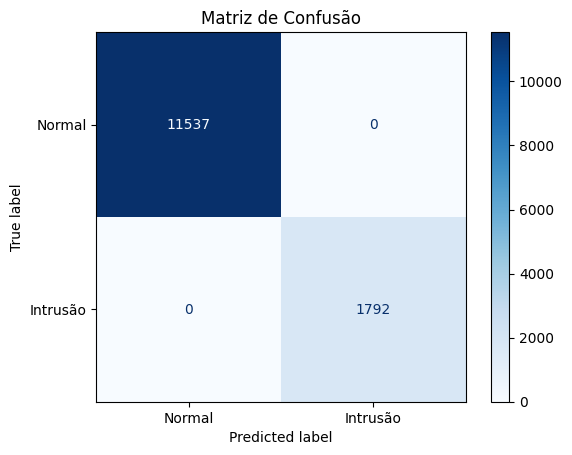

Avaliando o modelo: Gradient Boosting


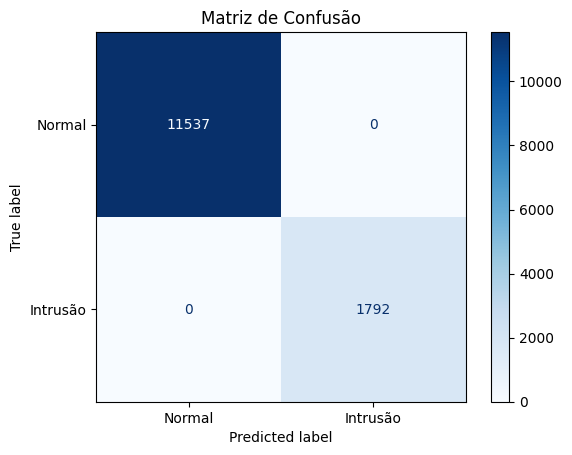

Avaliando o modelo: K-Nearest Neighbors


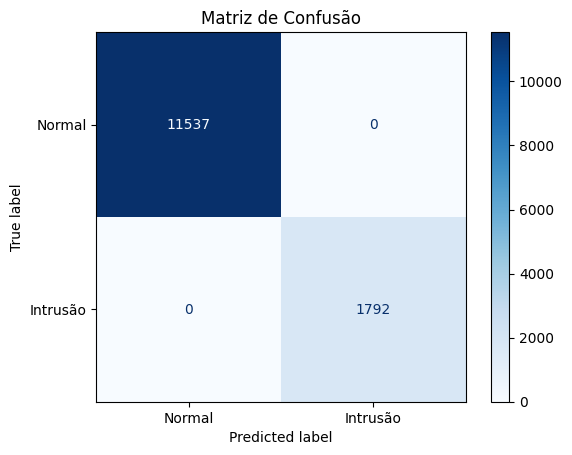

Avaliando o modelo: Logistic Regression


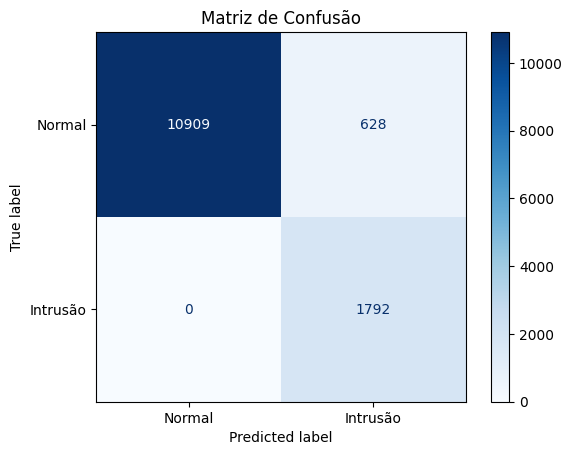

Avaliando o modelo: Decision Tree


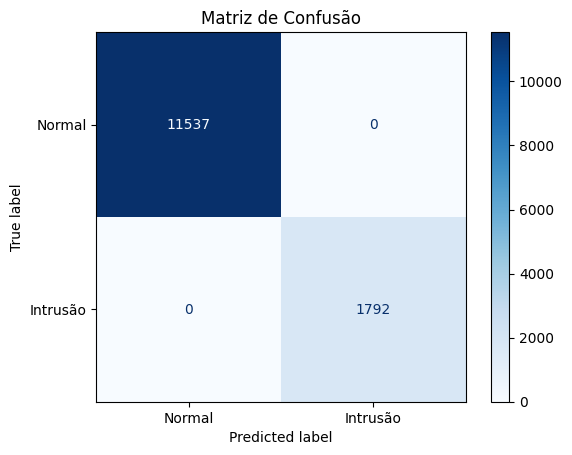

Avaliando o modelo: Support Vector Machine


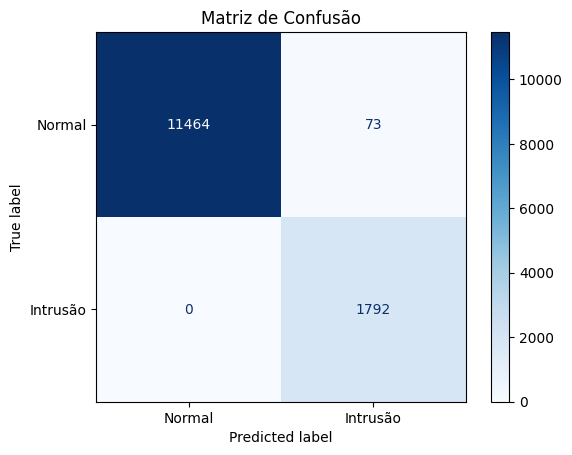

Avaliando o modelo: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


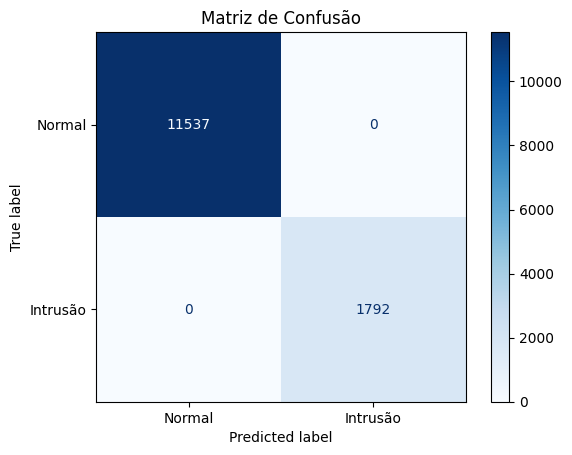

Avaliando o modelo: CatBoost


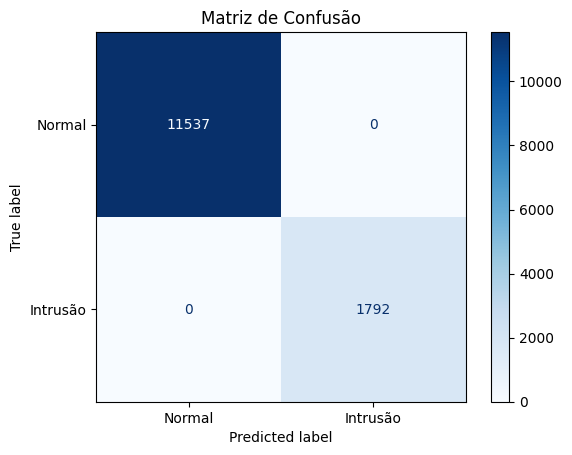

Comparação de Métricas dos Modelos
                   Modelo  Acurácia  Precisão  Recall  F1-Score   AUC-ROC
0           Random Forest  1.000000  1.000000     1.0  1.000000  1.000000
1       Gradient Boosting  1.000000  1.000000     1.0  1.000000  1.000000
2     K-Nearest Neighbors  1.000000  1.000000     1.0  1.000000  1.000000
3     Logistic Regression  0.952885  0.740496     1.0  0.850902  0.966889
4           Decision Tree  1.000000  1.000000     1.0  1.000000  1.000000
5  Support Vector Machine  0.994523  0.960858     1.0  0.980038  1.000000
6                 XGBoost  1.000000  1.000000     1.0  1.000000  1.000000
7                CatBoost  1.000000  1.000000     1.0  1.000000  1.000000


In [32]:
results_df = evaluate_models(X_train_balanced, X_test, y_train_balanced, y_test)

# Exibir os resultados
pd.set_option('display.max_colwidth', None)
print("Comparação de Métricas dos Modelos")
print(results_df[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']])